# Compare models for visual proprioception

Compares regression models for visual proprioception, by running them on specific test data, and creating comparison graphs that put all of them onto the graphs. 

Each configuration is specified by a run of type visual_proprioception.

In [11]:
import sys
sys.path.append("..")
from settings import Config

import pathlib
from pprint import pprint
import matplotlib.pyplot as plt

import numpy as np
import math
import torch
import torch.nn as nn
#import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(1)

# from behavior_cloning.demo_to_trainingdata import BCDemonstration
from sensorprocessing import sp_conv_vae, sp_propriotuned_cnn, sp_vit
# from robot.al5d_position_controller import RobotPosition

from visual_proprioception.visproprio_helper import load_demonstrations_as_proprioception_training, get_visual_proprioception_sp, load_multiview_demonstrations_as_proprioception_training
from visual_proprioception.visproprio_models import VisProprio_SimpleMLPRegression
from visproprio_helper import get_visual_proprioception_sp

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [12]:
experiment = "visual_proprioception"

# the lead run is the one that will provide the test data.
# also the directory of this run is where the graphs will be saved.

# all of them
# leadrun = "comp_all"
# leadrun = "comp_vae"
# leadrun = "comp_resnet"
# leadrun = "comp_vgg"
# leadrun = "comp_all_with_vit"
# leadrun = "comp_vit"
# leadrun = "comp_aruco"
# leadrun = "comp_vit_multiview_base"
# leadrun = "comp_vit_multiview_large"
leadrun = "comp_vit_multiview_all"


# now load them

leadexp = Config().get_experiment(experiment, leadrun)

runs = leadexp["tocompare"]

# runs = ["vp_convvae_128", "vp_convvae_256", "vp_ptun_vgg19_128", "vp_ptun_vgg19_256", "vp_ptun_resnet50_128", "vp_ptun_resnet50_256", "vp_aruco_128"]



exps = []
sps = [ ]
models = [ ]
for run in runs:
    exp = Config().get_experiment(experiment, run)
    exps.append(exp)
    sp = get_visual_proprioception_sp(exp, device)
    sps.append(sp)
    model = VisProprio_SimpleMLPRegression(exp)
    modelfile = pathlib.Path(exp["data_dir"],
                            exp["proprioception_mlp_model_file"])
    model.load_state_dict(torch.load(modelfile))
    models.append(model)


No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/visual_proprioception/comp_vit_multiview_all_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: visual_proprioception/comp_vit_multiview_all successfully loaded
No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/visual_proprioception/vit_base_multiview_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: visual_proprioception/vit_base_multiview successfully loaded
No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/sensorprocessing_propriotuned_Vit_multiview/vit_base_multiview_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: sensorprocessing_propriotuned_Vit_multiview/vit_base_multiview successfully loaded


Initializing Multi-View ViT Sensor Processing:
  Model: vit_b_16
  Number of views: 2
  Fusion type: concat_proj
  Latent dimension: 128
  Image size: 224x224
Using 2 x vit_b_16 with output dimension 768
Created fusion network (concat_proj): 1536 → 512 → 256 → 128
Created proprioceptor: 128 → 64 → 64 → 6
Feature extractors frozen. Projection and proprioceptor layers are trainable.
Loading Multi-View ViT encoder weights from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/sensorprocessing_propriotuned_Vit_multiview/vit_base_multiview/proprioception_mlp.pth


/lustre/fs1/home/ssheikholeslami/BerryPicker/src/visual_proprioception/../sensorprocessing/sp_vit_multiview.py:357: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.enc.lo

No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/visual_proprioception/vit_large_multiview_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: visual_proprioception/vit_large_multiview successfully loaded
No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/sensorprocessing_propriotuned_Vit_multiview/vit_large_multiview_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: sensorprocessing_propriotuned_Vit_multiview/vit_large_multiview successfully loaded


/tmp/ipykernel_3195894/4204439774.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelfile))


Initializing Multi-View ViT Sensor Processing:
  Model: vit_l_16
  Number of views: 2
  Fusion type: concat_proj
  Latent dimension: 128
  Image size: 224x224
Using 2 x vit_l_16 with output dimension 1024
Created fusion network (concat_proj): 2048 → 512 → 256 → 128
Created proprioceptor: 128 → 64 → 64 → 6
Feature extractors frozen. Projection and proprioceptor layers are trainable.
Loading Multi-View ViT encoder weights from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/sensorprocessing_propriotuned_Vit_multiview/vit_large_multiview/proprioception_mlp.pth


In [13]:
# Load test data for the lead experiment
task = leadexp["proprioception_testing_task"]
proprioception_input_file = pathlib.Path(
    leadexp["data_dir"], leadexp["proprioception_test_input_file"])
proprioception_target_file = pathlib.Path(
    leadexp["data_dir"], leadexp["proprioception_test_target_file"])

# Check if lead experiment is multi-view
is_lead_multiview = leadexp.get("sensor_processing", "") == "Vit_multiview" or leadexp.get("num_views", 1) > 1

if is_lead_multiview:
    # Use multi-view loading function for the lead experiment
    tr = load_multiview_demonstrations_as_proprioception_training(
        task,
        proprioception_input_file,
        proprioception_target_file,
        num_views=leadexp.get("num_views", 2)
    )
else:
    # Use original single-view loading function
    tr = load_demonstrations_as_proprioception_training(
        sp, task, proprioception_input_file, proprioception_target_file)

# The targets should be the same regardless of single or multi-view
targets = tr["targets"]
print(f"There are {targets.shape[0]} data points")

Cameras found: ['dev2', 'dev3']
There are 458 steps in this demonstration
This demonstration was recorded by the following cameras: ['dev2', 'dev3']
Extracted camera ID 'dev2' from filename
Using 1 unique views (with 1 duplicated)
Extracted camera ID 'dev3' from filename
Using complete set of 2 views from timestep 1
Extracted camera ID 'dev2' from filename
Using 2 unique views (with 0 duplicated)
Extracted camera ID 'dev3' from filename
Using complete set of 2 views from timestep 2
Extracted camera ID 'dev2' from filename
Using 2 unique views (with 0 duplicated)
Extracted camera ID 'dev3' from filename
Using complete set of 2 views from timestep 3
Extracted camera ID 'dev2' from filename
Using 2 unique views (with 0 duplicated)
Extracted camera ID 'dev3' from filename
Using complete set of 2 views from timestep 4
Extracted camera ID 'dev2' from filename
Using 2 unique views (with 0 duplicated)
Extracted camera ID 'dev3' from filename
Using complete set of 2 views from timestep 5
Extrac

Iterate throuh all the components. The thing with it though is that this will get the test data from the components, not from the lead exp.

FIXME: maybe I could just write a function that runs a particular proprioceptor on a whole task and returns the y, and then just call that. 

In [15]:
no_from = 0
no_to = targets.shape[0]

ypreds = []

for exp, sp, model in zip(exps, sps, models):
    # Make sure both sp and model are on the same device
    model = model.to(device)

    task = exp["proprioception_testing_task"]
    proprioception_input_file = pathlib.Path(
        exp["data_dir"], exp["proprioception_test_input_file"])
    proprioception_target_file = pathlib.Path(
        exp["data_dir"], exp["proprioception_test_target_file"])

    # Check if this is a multi-view model
    is_multiview = exp.get("sensor_processing", "") == "Vit_multiview" or exp.get("num_views", 1) > 1

    if is_multiview:
        # Use the multi-view data loading function
        tr = load_multiview_demonstrations_as_proprioception_training(
            task,
            proprioception_input_file,
            proprioception_target_file,
            num_views=exp.get("num_views", 2)
        )

        # Process each data point
        ypred = []
        y = []
        t = []

        with torch.no_grad():
            for i in range(no_from, no_to):
                # Get the latent representation from sp (which handles the multi-view encoding)
                views = [view[i].unsqueeze(0).to(device) for view in tr["view_inputs"]]
                latent = sp.process(views)

                # Important: Make sure the latent tensor is on the same device as the model
                latent_tensor = torch.from_numpy(latent).unsqueeze(0).to(device)

                # Pass latent to regression model
                predictions = model(latent_tensor)

                # Move predictions back to CPU for numpy conversion
                predictions_cpu = predictions.cpu()

                # Append the data
                t.append(i)
                y.append(targets[i].numpy())
                ypred.append(predictions_cpu[0].numpy())
    else:
        # Original single-view approach
        tr = load_demonstrations_as_proprioception_training(
            sp, task, proprioception_input_file, proprioception_target_file)
        inputs = tr["inputs"]

        ypred = []
        y = []
        t = []
        with torch.no_grad():
            for i in range(no_from, no_to):
                # Move input to the correct device
                x = inputs[i].to(device)
                predictions = model(torch.unsqueeze(x, dim=0))

                # Move predictions back to CPU for numpy conversion
                predictions_cpu = predictions.cpu()

                # Append the data
                t.append(i)
                y.append(targets[i].numpy())
                ypred.append(predictions_cpu[0].numpy())

    ypred = np.array(ypred)
    ypreds.append(ypred)
    y = np.array(y)
    t = np.array(t)

Loading cached data from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/visual_proprioception/vit_base_multiview/test_inputs.pt
Created 641 training examples and 316 validation examples
Loading demonstrations from /home/ssheikholeslami/SaharaBerryPickerData/demonstrations/demos/proprio_regressor_validation
Processing demonstration: 2025_03_08__14_32_20
Cameras found: ['dev2', 'dev3']
There are 458 steps in this demonstration
This demonstration was recorded by the following cameras: ['dev2', 'dev3']


Processing demonstration: 2025_03_08__14_29_07
Cameras found: ['dev2', 'dev3']
There are 501 steps in this demonstration
This demonstration was recorded by the following cameras: ['dev2', 'dev3']
Saved 957 training examples with 2 views each
Created 641 training examples and 316 validation examples


## Time compare plot - double column
At this point, we should have the ypreds, the y and the t and we can plot them.

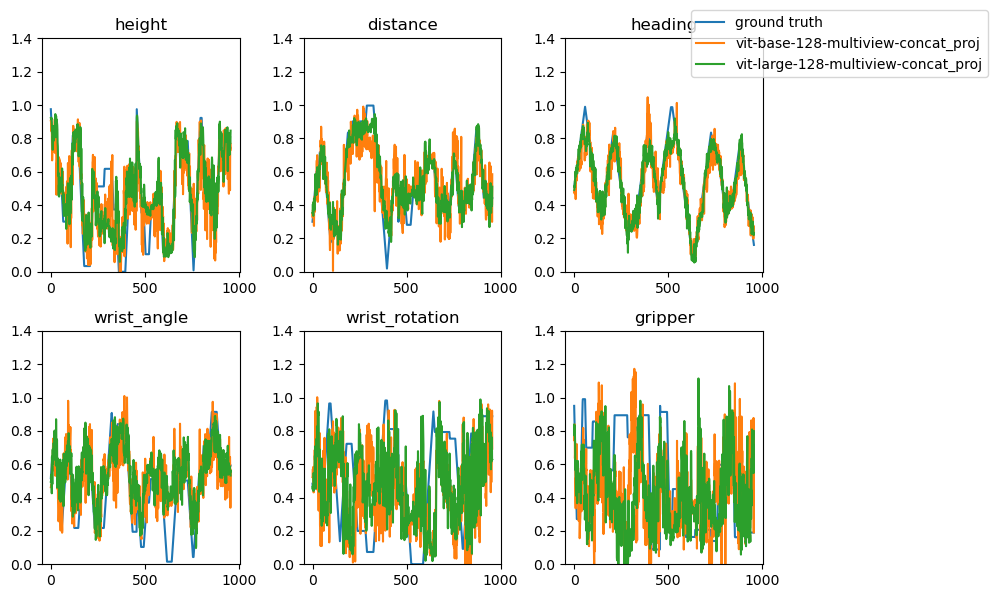

In [17]:
fig, axs = plt.subplots(2,3, figsize=(8, 6))
titles = ["height","distance", "heading", "wrist_angle", "wrist_rotation", "gripper"]
for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//3, i%3]
    ax.set_ylim(0, 1.4)
    ax.plot(t, y[:,i], label="ground truth")
    for ypred, exp in zip(ypreds,exps):
        # fixme, fix the label to the name in the exp
        ax.plot(t, ypred[:,i], label=exp["name"])
    if i==0:
        fig.legend(bbox_to_anchor=(1.25, 1))
    ax.set_title(titles[i])

plt.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "comparison.pdf")
plt.savefig(graphfilename, bbox_inches='tight')

## Time compare plot, single column

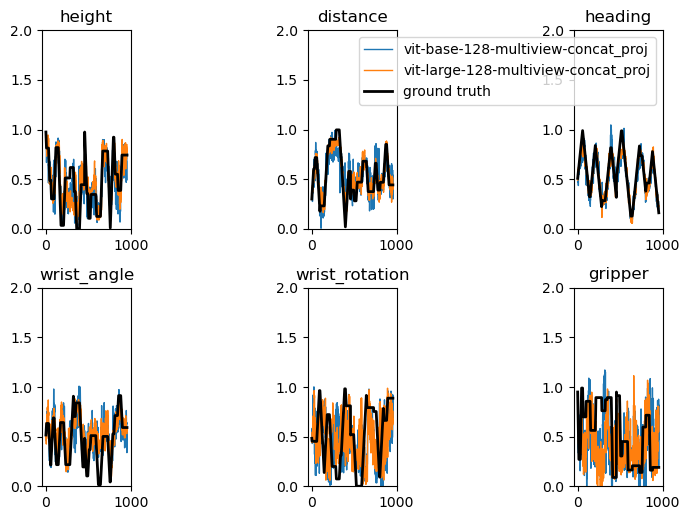

In [18]:
fig, axs = plt.subplots(2,3, figsize=(7, 5.3))
titles = ["height","distance", "heading", "wrist_angle", "wrist_rotation", "gripper"]
for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//3, i%3]
    ax.set_ylim(0, 2.0)
    for ypred, exp in zip(ypreds,exps):
        # fixme, fix the label to the name in the exp
        ax.plot(t, ypred[:,i], label=exp["name"], linewidth=1)
    ax.plot(t, y[:,i], label="ground truth", linewidth=2, color="black")
    if i==2:
        ax.legend()
    ax.set_title(titles[i])

plt.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "comparison.pdf")
plt.savefig(graphfilename, bbox_inches='tight')

## Time compare plot, vertical with legend bottom

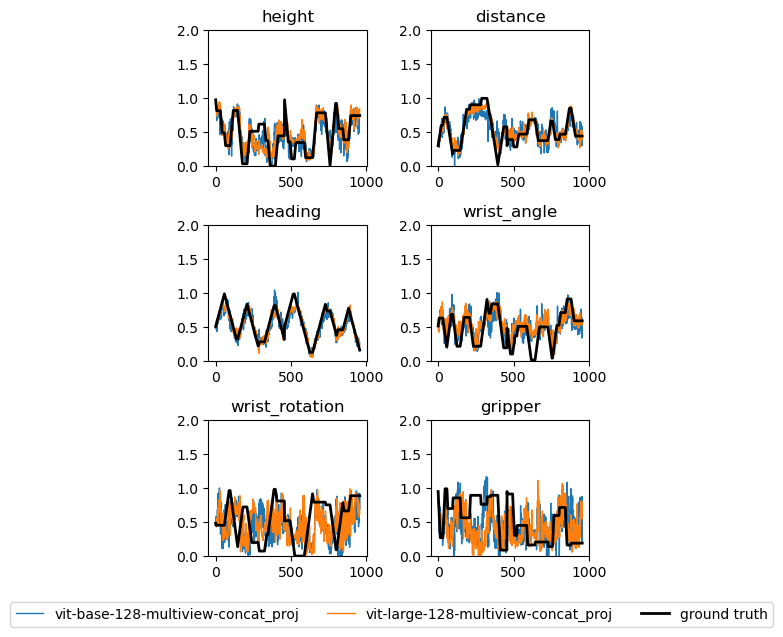

In [19]:
#fig, axs = plt.subplots(3,2, figsize=(5.3, 7))
fig, axs = plt.subplots(3,2, figsize=(4.6, 6))
titles = ["height","distance", "heading", "wrist_angle", "wrist_rotation", "gripper"]
for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//2, i%2]
    ax.set_ylim(0, 2.0)
    for ypred, exp in zip(ypreds,exps):
        # fixme, fix the label to the name in the exp
        ax.plot(t, ypred[:,i], label=exp["name"], linewidth=1)
    ax.plot(t, y[:,i], label="ground truth", linewidth=2, color="black")
    if i==4:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, ncol=len(exps)+1,
            bbox_to_anchor=(0.5, 0), loc="upper center")
    ax.set_title(titles[i])

plt.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "comparison23.pdf")
plt.savefig(graphfilename, bbox_inches='tight')
graphfilename = pathlib.Path(leadexp["data_dir"], "comparison23.jpg")
plt.savefig(graphfilename, bbox_inches='tight')

### Comparing the average accuracy
Create a graph that is comparing the average accuracy. 

/tmp/ipykernel_3195894/2912847698.py:21: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_3195894/2912847698.py:24: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


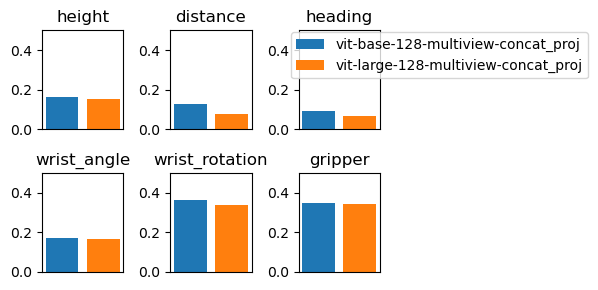

In [20]:
fig, axs = plt.subplots(2,3, figsize=(4, 3))

for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//3, i%3]
    # ax.set_ylim(0, 0.4)
    ax.set_ylim(0, 0.5)
    # ax.plot(t, y[:,i], label="y")
    bars = []
    names = []
    for ypred, exp in zip(ypreds,exps):
        ## FIXME: some kind of different plot
        # error = avg(y[:,i], ypred[:,i])
        error = math.sqrt(np.mean((y[:,i]- ypred[:,i]) ** 2))
        br = ax.bar(exp["name"], error)
        bars.append(br)
        names.append(exp["name"])
    # Remove x-axis labels if desired
    ax.set_xticks([])
    if i==0:
        fig.legend(bars, names, bbox_to_anchor=(1.50, 0.9), ncol=1)
    fig.tight_layout()
    ax.set_title(titles[i])

fig.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "msecomparison.pdf")
plt.savefig(graphfilename, bbox_inches='tight')
graphfilename = pathlib.Path(leadexp["data_dir"], "msecomparison.jpg")
plt.savefig(graphfilename, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(4.6, 6))

for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//2, i%2]
    # ax.set_ylim(0, 0.4)
    ax.set_ylim(0, 0.5)
    # ax.plot(t, y[:,i], label="y")
    bars = []
    names = []
    for ypred, exp in zip(ypreds,exps):
        ## FIXME: some kind of different plot
        # error = avg(y[:,i], ypred[:,i])
        error = math.sqrt(np.mean((y[:,i]- ypred[:,i]) ** 2))
        br = ax.bar(exp["name"], error, label=exp["name"])
        bars.append(br)
        names.append(exp["name"])
    # Remove x-axis labels if desired
    ax.set_xticks([])
    if i==4:
        handles, labels = ax.get_legend_handles_labels()
        #ncolumn = len(exps)
        ncolumn = 2
        fig.legend(handles, labels, ncol=ncolumn,
            bbox_to_anchor=(0.5, 0), loc="upper center")
    # fig.tight_layout()
    ax.set_title(titles[i])

fig.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "msecomparison23.pdf")
plt.savefig(graphfilename, bbox_inches='tight')
graphfilename = pathlib.Path(leadexp["data_dir"], "msecomparison23.jpg")
plt.savefig(graphfilename, bbox_inches='tight')